In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modules settings
%matplotlib inline

sns.set_theme(style='whitegrid', rc={'figure.figsize': (20, 10)})

In [2]:
d1 = pd.read_csv('./Ads.csv', index_col=0)

d1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [3]:
d2 = pd.read_csv('./Ads_kg.csv')

d2.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
d2['TV'] = d2['TV']*2.96

In [5]:
d2 = d2.drop('Influencer', axis=1)

In [6]:
d1['social'] = 0

In [7]:
j = 0

for i in range(200):
    d1.iloc[i, 4] = d2['Social Media'].iloc[j: j+22].median()
    j+=22

In [8]:
d1['social_sales'] = 0

In [9]:
j = 0

for i in range(200):
    unit_sales = d2.iloc[i, 3] / (d2.iloc[i, 0] + d2.iloc[i, 1] + d2.iloc[i, 2])
    pond_sales = unit_sales * d2.iloc[i, 2]
    
    d1.iloc[i, 5] = pond_sales
    j += 22

In [10]:
d1['sales'] = d1['sales'] + d1['social_sales']

In [11]:
d1 = d1.dropna()

In [12]:
d1.drop('social_sales', axis=1, inplace=True)

In [13]:
d1

,TV,radio,newspaper,sales,social
0,230.1,37.8,69.2,22102.800460,2.910696
1,44.5,39.3,45.1,10402.243757,3.809547
2,17.2,45.9,69.3,9303.121647,2.547321
3,151.5,41.3,58.5,18507.304985,3.758748
4,180.8,10.8,58.4,12901.466931,3.285149
...,...,...,...,...,...
193,166.8,42.0,3.6,19602.078226,3.316443
194,149.7,35.6,6.0,17302.211326,2.144428
196,94.2,4.9,8.1,9700.013722,2.547631
198,283.6,42.0,66.2,25500.339992,2.664184


In [14]:
d1.describe(include='all')

,TV,radio,newspaper,sales,social
count,184.000000,184.000000,184.000000,184.000000,184.000000
mean,149.790761,23.538587,30.333696,14154.134396,3.074988
std,85.517198,14.790090,21.490647,5164.541918,0.652308
min,0.700000,0.000000,0.300000,1606.217151,1.504594
25%,75.250000,10.750000,12.700000,10577.747978,2.622069
50%,159.950000,23.750000,25.600000,13054.686910,3.058508
75%,220.350000,36.525000,45.100000,17403.838239,3.515138
max,296.400000,49.600000,114.000000,27005.982454,4.813416


In [15]:
# Save dataframe as csv
# d1.to_csv(f'./ads.csv', encoding='utf-8')

___

In [3]:
ads = pd.read_excel('./Ads.xlsx')

ads.head()

,TV,radio,newspaper,social,sales
0,230.1,37.8,69.2,2.910696,22102.800460
1,44.5,39.3,45.1,3.809547,10402.243757
2,17.2,45.9,69.3,2.547321,9303.121647
3,151.5,41.3,58.5,3.758748,18507.304985
4,180.8,10.8,58.4,3.285149,12901.466931


In [5]:
ads.rename(columns={'radio': 'Radio', 'newspaper': 'Prensa y cartelería', 'social': 'Redes sociales', 'sales': 'Nuevas altas'}, inplace=True)

ads

,TV,Radio,Prensa y cartelería,Redes sociales,Nuevas altas
0,230.1,37.8,69.2,2.910696,22102.800460
1,44.5,39.3,45.1,3.809547,10402.243757
2,17.2,45.9,69.3,2.547321,9303.121647
3,151.5,41.3,58.5,3.758748,18507.304985
4,180.8,10.8,58.4,3.285149,12901.466931
...,...,...,...,...,...
179,166.8,42.0,3.6,3.316443,19602.078226
180,149.7,35.6,6.0,2.144428,17302.211326
181,94.2,4.9,8.1,2.547631,9700.013722
182,283.6,42.0,66.2,2.664184,25500.339992


In [6]:
ads['TV'] = round(ads['TV'] * 3.5, 2)
ads['Radio'] = round(ads['Radio'] * 8, 2)
ads['Prensa y cartelería'] = round(ads['Prensa y cartelería']* 1.6, 2)
ads['Redes sociales'] = round(ads['Redes sociales'] * 20, 2)
ads['Nuevas altas'] = round(ads['Nuevas altas']/1000, 0)

ads

,TV,Radio,Prensa y cartelería,Redes sociales,Nuevas altas
0,805.35,302.4,110.72,58.21,22.0
1,155.75,314.4,72.16,76.19,10.0
2,60.20,367.2,110.88,50.95,9.0
3,530.25,330.4,93.60,75.17,19.0
4,632.80,86.4,93.44,65.70,13.0
...,...,...,...,...,...
179,583.80,336.0,5.76,66.33,20.0
180,523.95,284.8,9.60,42.89,17.0
181,329.70,39.2,12.96,50.95,10.0
182,992.60,336.0,105.92,53.28,26.0


In [7]:
ads['Inversión'] = ads['TV'] + ads['Radio'] + ads['Prensa y cartelería'] + ads['Redes sociales']

ads

,TV,Radio,Prensa y cartelería,Redes sociales,Nuevas altas,Inversión
0,805.35,302.4,110.72,58.21,22.0,1276.68
1,155.75,314.4,72.16,76.19,10.0,618.50
2,60.20,367.2,110.88,50.95,9.0,589.23
3,530.25,330.4,93.60,75.17,19.0,1029.42
4,632.80,86.4,93.44,65.70,13.0,878.34
...,...,...,...,...,...,...
179,583.80,336.0,5.76,66.33,20.0,991.89
180,523.95,284.8,9.60,42.89,17.0,861.24
181,329.70,39.2,12.96,50.95,10.0,432.81
182,992.60,336.0,105.92,53.28,26.0,1487.80


In [8]:
ads['Buscadores'] = 1800 - ads['TV'] - ads['Radio'] - ads['Prensa y cartelería'] - ads['Redes sociales']

ads

,TV,Radio,Prensa y cartelería,Redes sociales,Nuevas altas,Inversión,Buscadores
0,805.35,302.4,110.72,58.21,22.0,1276.68,523.32
1,155.75,314.4,72.16,76.19,10.0,618.50,1181.50
2,60.20,367.2,110.88,50.95,9.0,589.23,1210.77
3,530.25,330.4,93.60,75.17,19.0,1029.42,770.58
4,632.80,86.4,93.44,65.70,13.0,878.34,921.66
...,...,...,...,...,...,...,...
179,583.80,336.0,5.76,66.33,20.0,991.89,808.11
180,523.95,284.8,9.60,42.89,17.0,861.24,938.76
181,329.70,39.2,12.96,50.95,10.0,432.81,1367.19
182,992.60,336.0,105.92,53.28,26.0,1487.80,312.20


In [9]:
ads['Inversión'] = ads['TV'] + ads['Radio'] + ads['Prensa y cartelería'] + ads['Redes sociales'] + ads['Buscadores']

ads

,TV,Radio,Prensa y cartelería,Redes sociales,Nuevas altas,Inversión,Buscadores
0,805.35,302.4,110.72,58.21,22.0,1800.0,523.32
1,155.75,314.4,72.16,76.19,10.0,1800.0,1181.50
2,60.20,367.2,110.88,50.95,9.0,1800.0,1210.77
3,530.25,330.4,93.60,75.17,19.0,1800.0,770.58
4,632.80,86.4,93.44,65.70,13.0,1800.0,921.66
...,...,...,...,...,...,...,...
179,583.80,336.0,5.76,66.33,20.0,1800.0,808.11
180,523.95,284.8,9.60,42.89,17.0,1800.0,938.76
181,329.70,39.2,12.96,50.95,10.0,1800.0,1367.19
182,992.60,336.0,105.92,53.28,26.0,1800.0,312.20


In [10]:
ads['Coste alta'] = (ads['TV'] + ads['Radio'] + ads['Prensa y cartelería'] + ads['Redes sociales']) / ads['Nuevas altas']

ads

,TV,Radio,Prensa y cartelería,Redes sociales,Nuevas altas,Inversión,Buscadores,Coste alta
0,805.35,302.4,110.72,58.21,22.0,1800.0,523.32,58.030909
1,155.75,314.4,72.16,76.19,10.0,1800.0,1181.50,61.850000
2,60.20,367.2,110.88,50.95,9.0,1800.0,1210.77,65.470000
3,530.25,330.4,93.60,75.17,19.0,1800.0,770.58,54.180000
4,632.80,86.4,93.44,65.70,13.0,1800.0,921.66,67.564615
...,...,...,...,...,...,...,...,...
179,583.80,336.0,5.76,66.33,20.0,1800.0,808.11,49.594500
180,523.95,284.8,9.60,42.89,17.0,1800.0,938.76,50.661176
181,329.70,39.2,12.96,50.95,10.0,1800.0,1367.19,43.281000
182,992.60,336.0,105.92,53.28,26.0,1800.0,312.20,57.223077


In [11]:
ads = ads[['TV', 'Radio', 'Prensa y cartelería', 'Redes sociales', 'Buscadores', 'Nuevas altas', 'Inversión', 'Coste alta']]

ads

,TV,Radio,Prensa y cartelería,Redes sociales,Buscadores,Nuevas altas,Inversión,Coste alta
0,805.35,302.4,110.72,58.21,523.32,22.0,1800.0,58.030909
1,155.75,314.4,72.16,76.19,1181.50,10.0,1800.0,61.850000
2,60.20,367.2,110.88,50.95,1210.77,9.0,1800.0,65.470000
3,530.25,330.4,93.60,75.17,770.58,19.0,1800.0,54.180000
4,632.80,86.4,93.44,65.70,921.66,13.0,1800.0,67.564615
...,...,...,...,...,...,...,...,...
179,583.80,336.0,5.76,66.33,808.11,20.0,1800.0,49.594500
180,523.95,284.8,9.60,42.89,938.76,17.0,1800.0,50.661176
181,329.70,39.2,12.96,50.95,1367.19,10.0,1800.0,43.281000
182,992.60,336.0,105.92,53.28,312.20,26.0,1800.0,57.223077


In [12]:
ads.rename(columns={'Radio': 'Buscadores',
                    'Buscadores': 'Redes sociales',
                    'Redes sociales': 'Prensa y cartelería',
                    'Prensa y cartelería': 'Radio',
                    },
           inplace=True)

ads

,TV,Buscadores,Radio,Prensa y cartelería,Redes sociales,Nuevas altas,Inversión,Coste alta
0,805.35,302.4,110.72,58.21,523.32,22.0,1800.0,58.030909
1,155.75,314.4,72.16,76.19,1181.50,10.0,1800.0,61.850000
2,60.20,367.2,110.88,50.95,1210.77,9.0,1800.0,65.470000
3,530.25,330.4,93.60,75.17,770.58,19.0,1800.0,54.180000
4,632.80,86.4,93.44,65.70,921.66,13.0,1800.0,67.564615
...,...,...,...,...,...,...,...,...
179,583.80,336.0,5.76,66.33,808.11,20.0,1800.0,49.594500
180,523.95,284.8,9.60,42.89,938.76,17.0,1800.0,50.661176
181,329.70,39.2,12.96,50.95,1367.19,10.0,1800.0,43.281000
182,992.60,336.0,105.92,53.28,312.20,26.0,1800.0,57.223077


In [15]:
ads['Radio'] = ads['TV'] + ads['Radio']

In [16]:
ads.drop('TV', axis=1, inplace=True)

In [18]:
ads.rename(columns={'Radio': 'Medios tradicionales',
                    },
           inplace=True)

ads

,Medios tradicionales,Prensa y cartelería,Redes sociales,Buscadores,Nuevas altas,Inversión,Coste alta
0,916.07,58.21,523.32,302.4,22.0,1800.0,58.030909
1,227.91,76.19,1181.50,314.4,10.0,1800.0,61.850000
2,171.08,50.95,1210.77,367.2,9.0,1800.0,65.470000
3,623.85,75.17,770.58,330.4,19.0,1800.0,54.180000
4,726.24,65.70,921.66,86.4,13.0,1800.0,67.564615
...,...,...,...,...,...,...,...
179,589.56,66.33,808.11,336.0,20.0,1800.0,49.594500
180,533.55,42.89,938.76,284.8,17.0,1800.0,50.661176
181,342.66,50.95,1367.19,39.2,10.0,1800.0,43.281000
182,1098.52,53.28,312.20,336.0,26.0,1800.0,57.223077


In [19]:
ads = ads[['Medios tradicionales', 'Prensa y cartelería', 'Redes sociales', 'Buscadores', 'Nuevas altas', 'Inversión', 'Coste alta']]

ads

,Medios tradicionales,Prensa y cartelería,Redes sociales,Buscadores,Nuevas altas,Inversión,Coste alta
0,916.07,58.21,523.32,302.4,22.0,1800.0,58.030909
1,227.91,76.19,1181.50,314.4,10.0,1800.0,61.850000
2,171.08,50.95,1210.77,367.2,9.0,1800.0,65.470000
3,623.85,75.17,770.58,330.4,19.0,1800.0,54.180000
4,726.24,65.70,921.66,86.4,13.0,1800.0,67.564615
...,...,...,...,...,...,...,...
179,589.56,66.33,808.11,336.0,20.0,1800.0,49.594500
180,533.55,42.89,938.76,284.8,17.0,1800.0,50.661176
181,342.66,50.95,1367.19,39.2,10.0,1800.0,43.281000
182,1098.52,53.28,312.20,336.0,26.0,1800.0,57.223077


In [20]:
ads.corr()['Nuevas altas']

Medios tradicionales    0.782082
Prensa y cartelería     0.025815
Redes sociales         -0.914915
Buscadores              0.562823
Nuevas altas            1.000000
Inversión              -0.002236
Coste alta              0.000999
Name: Nuevas altas, dtype: float64

In [22]:
def scatter_plot(canal, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        ads[canal],
        ads[target],
        c='orange'
    )
    plt.xlabel(f'Gasto en {canal} (€)')
    plt.ylabel("Nuevas altas")
    plt.show()

def regresion_plot(canal, target):
    plt.figure(figsize=(16, 8))
    sns.regplot(
        x=ads[canal],
        y=ads[target],
        color='orange'
    )
    plt.xlabel(f'Gasto en {canal} (€)')
    plt.ylabel("Nuevas altas")
    plt.show()

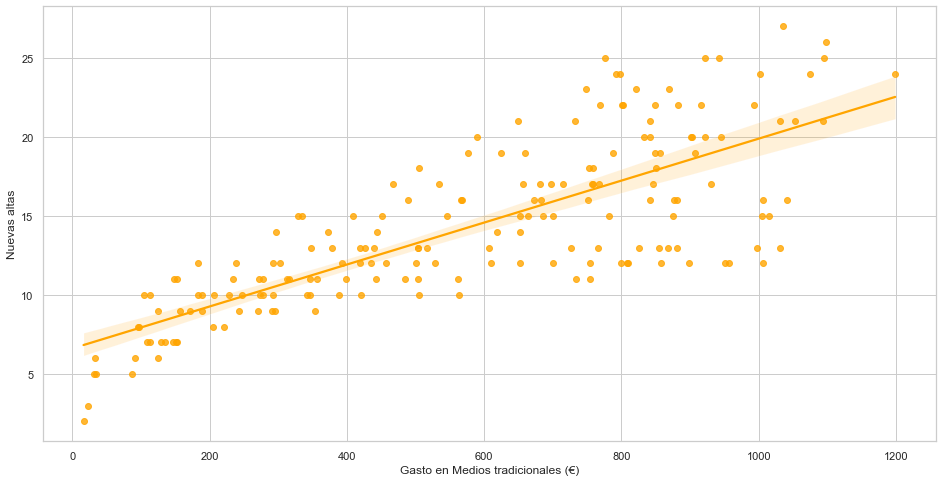

In [23]:
regresion_plot('Medios tradicionales', 'Nuevas altas')

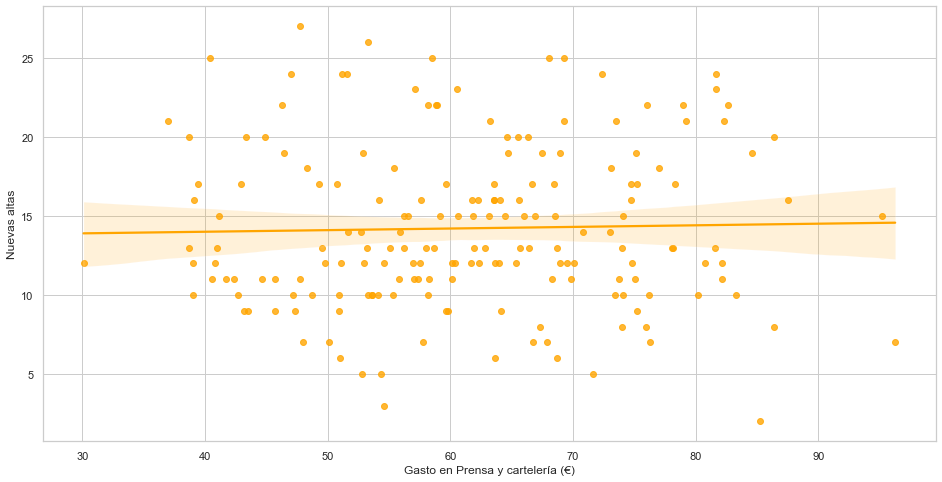

In [25]:
regresion_plot('Prensa y cartelería', 'Nuevas altas')

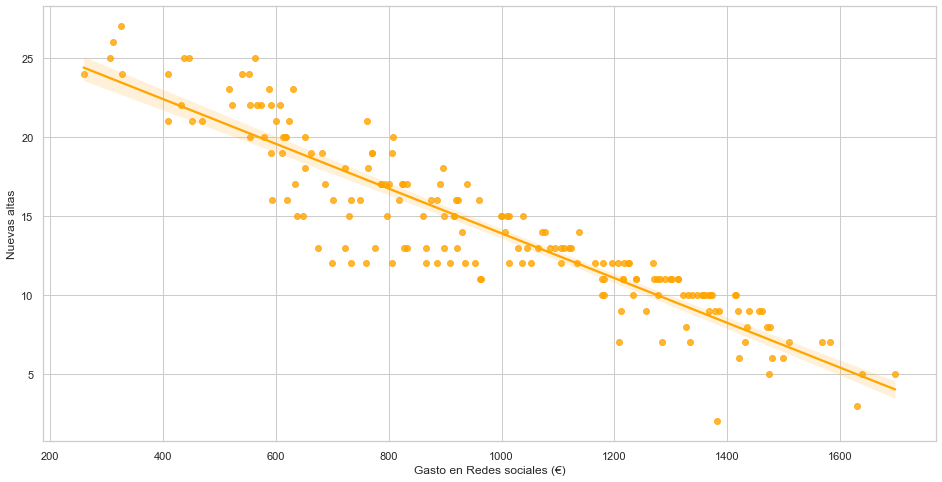

In [26]:
regresion_plot('Redes sociales', 'Nuevas altas')

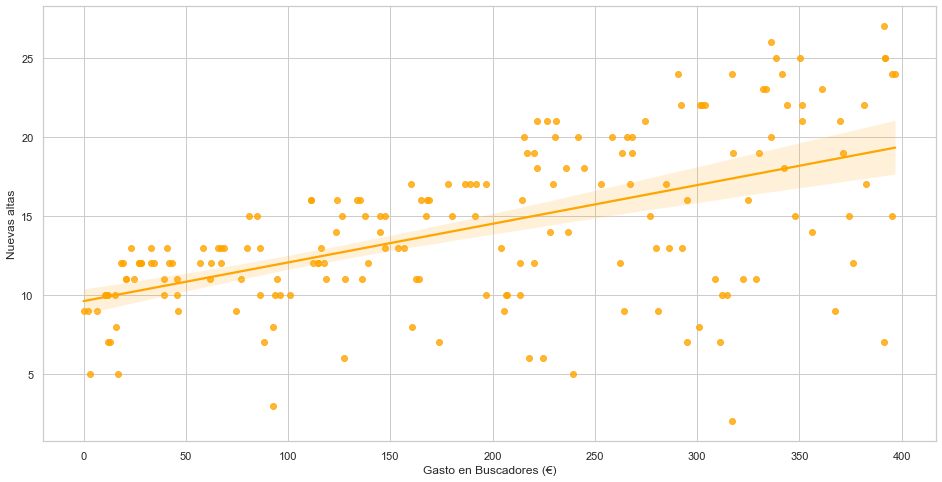

In [27]:
regresion_plot('Buscadores', 'Nuevas altas')

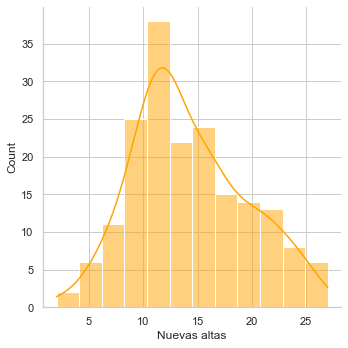

In [28]:
sns.displot(ads['Nuevas altas'],
            kde=True,
            color='orange');

___

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(ads.drop(columns=['Nuevas altas', 'Inversión', 'Coste alta']),
                                                    ads['Nuevas altas'], 
                                                    test_size= 0.20,
                                                    random_state=42)

In [31]:
# Regresion lineal
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("MSE:", mean_squared_error(y_test, lin_reg.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))

MSE: 3.6346798458614864
RMSE: 1.9064836337775066


In [32]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

print("MSE:", mean_squared_error(y_test, ridge.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MSE: 3.610299101677623
RMSE: 1.9000787093374905


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge,
                               parameters,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               error_score = np.nan)

ridge_regressor.fit(X_train, y_train)

/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.57924e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.31925e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.57924e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.31925e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [34]:
ridge_regressor.best_params_, ridge_regressor.best_score_

({'alpha': 20}, -3.221231929256343)

In [35]:
# Lasso regresssion
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

print("MSE:", mean_squared_error(y_test, lasso.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

MSE: 3.68674960864445
RMSE: 1.9200910417593353


In [36]:
# Lasso regression
lasso= Lasso()
parameters = {'alpha': [1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso,
                               parameters,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               error_score=np.nan);

lasso_regressor.fit(X_train, y_train)

/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+01, tolerance: 3.223e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+01, tolerance: 3.223e-01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [37]:
lasso_regressor.best_params_, lasso_regressor.best_score_

({'alpha': 5}, -3.1801557297950884)

In [38]:
# Elastic net regression
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=100, l1_ratio=0.99)
elastic.fit(X_train, y_train)

print("MSE:", mean_squared_error(y_test, elastic.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

MSE: 4.384147576505543
RMSE: 2.093835613534535


In [39]:
%%time
elastic = ElasticNet()
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 50, 100],
'l1_ratio': np.arange(0.01, 1, 0.1)}

elastic_regressor = GridSearchCV(elastic,
                                 parameters,
                                 scoring='neg_mean_squared_error',
                                 cv=5,
                                 error_score=np.nan)
elastic_regressor.fit(X_train, y_train)

/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.992e+01, tolerance: 3.223e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.864e+00, tolerance: 2.893e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

CPU times: user 1.35 s, sys: 39.3 ms, total: 1.39 s
Wall time: 1.38 s


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100],
                         'l1_ratio': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])},
             scoring='neg_mean_squared_error')

In [40]:
elastic_regressor.best_params_, elastic_regressor.best_score_

({'alpha': 50, 'l1_ratio': 0.11}, -3.179581967363299)

In [41]:
# Aplicando standard scaler al mejor resultado
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

elastic = ElasticNet()

parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 50, 100],
              'l1_ratio': np.arange(0.01, 0.1, 1)}
elastic_regressor = GridSearchCV(elastic,
                                 parameters,
                                 scoring='neg_mean_squared_error',
                                 cv=5,
                                 error_score=np.nan)
elastic_regressor.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+02, tolerance: 3.223e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.773e+02, tolerance: 2.893e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100],
                         'l1_ratio': array([0.01])},
             scoring='neg_mean_squared_error')

In [42]:
elastic_regressor.best_score_

-3.2196184250379027

In [43]:
elastic_regressor.best_params_

{'alpha': 0.01, 'l1_ratio': 0.01}

In [44]:
elastic_regressor.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=0.01)

In [45]:
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [46]:
elastic_regressor.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.5,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': ElasticNet(),
 'n_jobs': None,
 'param_grid': {'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100],
  'l1_ratio': array([0.01])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0}

In [47]:
elastic_regressor.cv_results_

{'mean_fit_time': array([0.00202217, 0.00180755, 0.00137916, 0.00084615, 0.00077276,
        0.00063872, 0.00050964, 0.00063572, 0.00086098]),
 'std_fit_time': array([5.79413239e-04, 4.26902127e-04, 2.55054201e-04, 2.43939190e-04,
        1.65470560e-04, 2.07316875e-04, 6.09911074e-05, 1.34102565e-04,
        2.91887733e-04]),
 'mean_score_time': array([0.00051293, 0.00049729, 0.00041733, 0.00025907, 0.00034428,
        0.00022535, 0.00023985, 0.0002985 , 0.0003798 ]),
 'std_score_time': array([1.36932954e-04, 1.21107570e-04, 7.01886804e-05, 3.08718827e-05,
        1.12750463e-04, 3.17766085e-05, 6.62074271e-05, 1.02771959e-04,
        9.01035512e-05]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_l1_ratio': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    

In [48]:
# Prediciendo con el mejor resultado
scaler = StandardScaler()
scaler.fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)

elastic_best = ElasticNet(alpha=0.01, l1_ratio=0.01)
elastic_best.fit(X_train.values, y_train.values)

/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+01, tolerance: 3.814e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0.01)

In [74]:
print('Altas esperadas con inversión 25% / 25% / 25% / 25% -',
      elastic_best.predict([[450, 450, 450, 450]]))

Altas esperadas con inversión 25% / 25% / 25% / 25% - [17.53098209]


In [75]:
print('Altas esperadas con inversión 30% / 20% / 15% / 35% -',
      elastic_best.predict([[500, 400, 300, 600]]))

Altas esperadas con inversión 30% / 20% / 15% / 35% - [21.70378264]


In [76]:
print('Altas esperadas con inversión 35% / 20% / 15% / 45% -',
      elastic_best.predict([[650, 350, 0, 800]]))

Altas esperadas con inversión 35% / 20% / 15% / 45% - [28.263078]
